# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observable Trends

1. The data shows that as a the latitude of a city approaches the equator, its maximum temperature increases.

2. There does not appear to be a relationship between the latitude of a city and its humidity, cloudiness, or wind speed.

3. The city's with the warmest temperature seem to be located between the Tropic of Cancer (23.5 degrees North of the equator) and the Tropic of Capricorn (23.5 degrees South of the equator).

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import requests
from pprint import pprint
import random

# Import API key
from api_keys import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())
# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create a data frame to store info
weather_df = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Country': countries, 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})

#Preview the dataframe
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,catuday,,PH,,,,,,
1,silikatnyy,,RU,,,,,,
2,georgetown,,SH,,,,,,
3,rikitea,,PF,,,,,,
4,tromso,,NO,,,,,,


In [4]:
# Base URL 
url = "http://api.openweathermap.org/data/2.5/weather?q="
units = "imperial"

In [5]:
# Create variables to track response number
rec_num = 1
set_num = 1

#Run the API call for each city
print ("Beginning Data Retrieval")
print ("-----------------------------")

for index, row in weather_df.iterrows(): 
    
    #Create the query url for the API call
    query_url = url + row['City'] + ',' + row['Country'] + '&units=' + units + '&APPID=' + weather_key
    
    # Call API
    response = requests.get(query_url).json()
    
    # Exception if city not found
    try:
        #Retrieval message
        print(f"Processing Weather Data for Record {rec_num} of Set {set_num} | {row['City']}")
       
        # Add the data to weather_df
        weather_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        weather_df.loc[index, 'Date'] = response['dt']
        weather_df.loc[index, 'Humidity'] = response['main']['humidity']
        weather_df.loc[index, 'Lat'] = response['coord']['lat']
        weather_df.loc[index, 'Lng'] = response['coord']['lon']
        weather_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        weather_df.loc[index, 'Windspeed'] = response['wind']['speed']
        
        #Increase the record count
        rec_num += 1

   
    except:
        print("City not found...Skipping...")

print("-------------------------------")        
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval
-----------------------------
Processing Weather Data for Record 1 of Set 1 | catuday
Processing Weather Data for Record 2 of Set 1 | silikatnyy
Processing Weather Data for Record 3 of Set 1 | georgetown
Processing Weather Data for Record 4 of Set 1 | rikitea
Processing Weather Data for Record 5 of Set 1 | tromso
Processing Weather Data for Record 6 of Set 1 | taolanaro
City not found...Skipping...
Processing Weather Data for Record 6 of Set 1 | cheyenne
Processing Weather Data for Record 7 of Set 1 | nanortalik
Processing Weather Data for Record 8 of Set 1 | avarua
Processing Weather Data for Record 9 of Set 1 | san patricio
Processing Weather Data for Record 10 of Set 1 | yibin
Processing Weather Data for Record 11 of Set 1 | bredasdorp
Processing Weather Data for Record 12 of Set 1 | hermanus
Processing Weather Data for Record 13 of Set 1 | barentsburg
City not found...Skipping...
Processing Weather Data for Record 13 of Set 1 | jinchang
Processing Weather D

Processing Weather Data for Record 115 of Set 1 | sao filipe
Processing Weather Data for Record 116 of Set 1 | bethel
Processing Weather Data for Record 117 of Set 1 | nizhniy ingash
Processing Weather Data for Record 118 of Set 1 | semey
Processing Weather Data for Record 119 of Set 1 | ambilobe
Processing Weather Data for Record 120 of Set 1 | saint-louis
Processing Weather Data for Record 121 of Set 1 | harper
Processing Weather Data for Record 122 of Set 1 | hunchun
Processing Weather Data for Record 123 of Set 1 | kasongo-lunda
Processing Weather Data for Record 124 of Set 1 | sao joao da barra
Processing Weather Data for Record 125 of Set 1 | tyret pervaya
Processing Weather Data for Record 126 of Set 1 | port hardy
Processing Weather Data for Record 127 of Set 1 | longyearbyen
Processing Weather Data for Record 128 of Set 1 | batagay-alyta
Processing Weather Data for Record 129 of Set 1 | moberly
Processing Weather Data for Record 130 of Set 1 | qaanaaq
Processing Weather Data f

Processing Weather Data for Record 231 of Set 1 | muravlenko
Processing Weather Data for Record 232 of Set 1 | atbasar
Processing Weather Data for Record 233 of Set 1 | ostrovnoy
Processing Weather Data for Record 234 of Set 1 | zhigansk
Processing Weather Data for Record 235 of Set 1 | praia
Processing Weather Data for Record 236 of Set 1 | yumen
Processing Weather Data for Record 237 of Set 1 | gobabis
Processing Weather Data for Record 238 of Set 1 | chapais
Processing Weather Data for Record 239 of Set 1 | mount gambier
Processing Weather Data for Record 240 of Set 1 | berlevag
Processing Weather Data for Record 241 of Set 1 | ardrishaig
Processing Weather Data for Record 242 of Set 1 | bambous virieux
Processing Weather Data for Record 243 of Set 1 | dinajpur
Processing Weather Data for Record 244 of Set 1 | vila do maio
Processing Weather Data for Record 245 of Set 1 | dali
Processing Weather Data for Record 246 of Set 1 | frasinet
Processing Weather Data for Record 247 of Set 1 

Processing Weather Data for Record 357 of Set 1 | karaul
City not found...Skipping...
Processing Weather Data for Record 357 of Set 1 | lavrentiya
Processing Weather Data for Record 358 of Set 1 | wanning
Processing Weather Data for Record 359 of Set 1 | simplicio mendes
Processing Weather Data for Record 360 of Set 1 | pinyug
Processing Weather Data for Record 361 of Set 1 | nome
Processing Weather Data for Record 362 of Set 1 | rabat
Processing Weather Data for Record 363 of Set 1 | hay river
Processing Weather Data for Record 364 of Set 1 | bolshevik
Processing Weather Data for Record 365 of Set 1 | stornoway
Processing Weather Data for Record 366 of Set 1 | lac du bonnet
Processing Weather Data for Record 367 of Set 1 | kurumkan
Processing Weather Data for Record 368 of Set 1 | stoyba
City not found...Skipping...
Processing Weather Data for Record 368 of Set 1 | bengkulu
Processing Weather Data for Record 369 of Set 1 | romanovo
Processing Weather Data for Record 370 of Set 1 | vil

Processing Weather Data for Record 476 of Set 1 | caravelas
Processing Weather Data for Record 477 of Set 1 | beringovskiy
Processing Weather Data for Record 478 of Set 1 | tochio
Processing Weather Data for Record 479 of Set 1 | rio gallegos
Processing Weather Data for Record 480 of Set 1 | praia da vitoria
Processing Weather Data for Record 481 of Set 1 | portland
Processing Weather Data for Record 482 of Set 1 | shimoda
Processing Weather Data for Record 483 of Set 1 | springdale
Processing Weather Data for Record 484 of Set 1 | bay saint louis
Processing Weather Data for Record 485 of Set 1 | kurchatov
Processing Weather Data for Record 486 of Set 1 | watsa
Processing Weather Data for Record 487 of Set 1 | sai buri
Processing Weather Data for Record 488 of Set 1 | hobyo
Processing Weather Data for Record 489 of Set 1 | prieska
Processing Weather Data for Record 490 of Set 1 | hambantota
Processing Weather Data for Record 491 of Set 1 | pandan
Processing Weather Data for Record 492 

In [6]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,catuday,61,PH,1584246891,80,16.29,119.81,79.61,15.79
1,silikatnyy,90,RU,1584246891,100,53.99,48.33,33.8,6.71
2,georgetown,100,SH,1584246891,75,-7.93,-14.42,79.74,15.66
3,rikitea,3,PF,1584246891,71,-23.12,-134.97,78.84,9.75
4,tromso,75,NO,1584246667,86,69.65,18.96,33.8,35.57


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df['Lat'] = pd.to_numeric(weather_df['Lat'])
weather_df['Lng'] = pd.to_numeric(weather_df['Lng'])
weather_df['Max Temp'] = pd.to_numeric(weather_df['Max Temp'])
weather_df['Humidity'] = pd.to_numeric(weather_df['Humidity'])
weather_df['Cloudiness'] = pd.to_numeric(weather_df['Cloudiness'])
weather_df['Windspeed'] = pd.to_numeric(weather_df['Windspeed'])

In [8]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,catuday,61.0,PH,1584246891,80.0,16.29,119.81,79.61,15.79
1,silikatnyy,90.0,RU,1584246891,100.0,53.99,48.33,33.80,6.71
2,georgetown,100.0,SH,1584246891,75.0,-7.93,-14.42,79.74,15.66
3,rikitea,3.0,PF,1584246891,71.0,-23.12,-134.97,78.84,9.75
4,tromso,75.0,NO,1584246667,86.0,69.65,18.96,33.80,35.57


In [9]:
# Remove cities that were not found
weather_df['Date'] = weather_df['Date'].replace('', np.nan)
weather_df = weather_df.dropna()

# Export city data to csv
weather_df.to_csv("WeatherData.csv", encoding="utf-8", index=False, header=True)

In [10]:
# Display the dataframe
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,catuday,61.0,PH,1.584247e+09,80.0,16.29,119.81,79.61,15.79
1,silikatnyy,90.0,RU,1.584247e+09,100.0,53.99,48.33,33.80,6.71
2,georgetown,100.0,SH,1.584247e+09,75.0,-7.93,-14.42,79.74,15.66
3,rikitea,3.0,PF,1.584247e+09,71.0,-23.12,-134.97,78.84,9.75
4,tromso,75.0,NO,1.584247e+09,86.0,69.65,18.96,33.80,35.57
...,...,...,...,...,...,...,...,...,...
595,pochutla,40.0,MX,1.584247e+09,83.0,15.74,-96.47,82.40,4.70
596,maltahohe,0.0,NA,1.584247e+09,28.0,-24.83,16.98,69.06,10.27
598,faanui,12.0,PF,1.584247e+09,77.0,-16.48,-151.75,82.90,11.43
599,palmer,90.0,US,1.584247e+09,51.0,42.16,-72.33,41.00,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

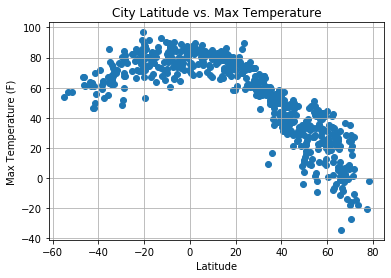

In [11]:
# Lat vs. Temp scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")

# Format plot
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save plotted figure
plt.savefig("City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

The plot depicts that the closer a city is to the equator, the higher its max temperature appears to be. In contrast, the further a city is located from the equator, the lower its max temperature.

#### Latitude vs. Humidity Plot

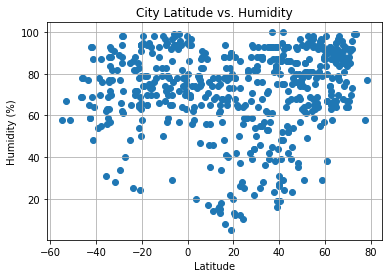

In [12]:
# Lat vs. Humidity scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")

# Format plot
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save plotted figure
plt.savefig("City Latitude vs. Humidity.png")

# Show plot
plt.show()

There does not seem to be much of a relationship between a city's latitude and its humidity percentage. However, there appears to be a very slight decrease in humidity as latitude reaches 20-60 degrees.

#### Latitude vs. Cloudiness Plot

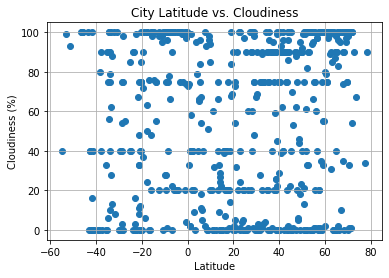

In [13]:
# Lat vs. Cloudiness scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")

# Format plot
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save plotted figure
plt.savefig("City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

There does not appear to be a relationship between a city's latitude and its percentage of cloudiness.

#### Latitude vs. Wind Speed Plot

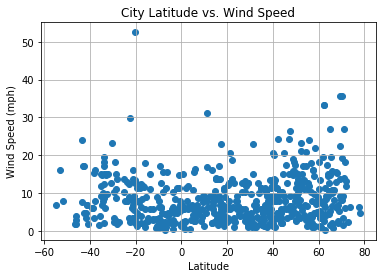

In [14]:
# Lat vs. Wind Speed plot
plt.scatter(weather_df["Lat"], weather_df["Windspeed"], marker="o")

# Format plot
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save plotted figure
plt.savefig("City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

There does not appear to be a relationship between city latitude and wind speed. 

## Linear Regression

In [11]:
# Create Northern and Southern Hemisphere DataFrames
n_hem = weather_df.loc[weather_df["Lat"] >= 0]

s_hem = weather_df.loc[weather_df["Lat"] < 0]

In [12]:
n_hem.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,catuday,61.0,PH,1.584247e+09,80.0,16.29,119.81,79.61,15.79
1,silikatnyy,90.0,RU,1.584247e+09,100.0,53.99,48.33,33.80,6.71
4,tromso,75.0,NO,1.584247e+09,86.0,69.65,18.96,33.80,35.57
6,cheyenne,90.0,US,1.584247e+09,100.0,41.14,-104.82,32.00,10.38
7,nanortalik,100.0,GL,1.584247e+09,93.0,60.14,-45.24,22.73,7.27


In [58]:
#Northern Hemisphere - Temperature (F) vs. Latitude

def plot_regression(x_vals,y_vals,xlabel,ylabel,labelpos,ifig):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
    
    print(f"The r-squared is: {rvalue}")
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    regress_values = x_vals * slope + intercept
    
    plt.scatter(x_vals,y_vals)
    plt.plot(x_vals,regress_values,"r-")
    plt.annotate(line_eq,labelpos,fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(ifig)
    #plt.savefig(f"output/WeatherPyImages/fig{ifig}.png")
    plt.show()
    

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8998352803691094


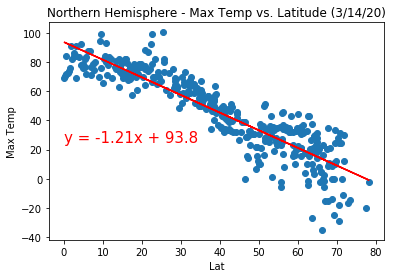

In [59]:
# Northern Hemisphere - Max Temp vs. Lat
xlabel = "Lat"
ylabel = "Max Temp"
labelpos = (0,25)
ifig="Northern Hemisphere - Max Temp vs. Latitude (3/14/20)"
#plt.savefig("
plot_regression(n_hem[xlabel], n_hem[ylabel], xlabel, ylabel, labelpos, ifig)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5512085021201765


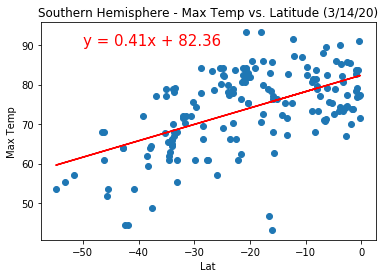

In [29]:
# Southern Hemisphere - Max Temp vs. Lat
xlabel = "Lat"
ylabel = "Max Temp"
labelpos = (-50,90)
ifig="Southern Hemisphere - Max Temp vs. Latitude (3/14/20)"
plot_regression(s_hem[xlabel], s_hem[ylabel], xlabel, ylabel, labelpos, ifig) 

After running the linear regression for Maximum Temperature vs. Latitude for each hemisphere, the models and plots show that cities located in the Northern Hemisphere have a strong negative correlation between max temp and latitude. However, cities located in the Southern Hemisphere have a moderate positive correlation between max temp and latitude. For both hemispheres, the data depicts that the closer a city's latitude is to the equator, the higher its maximum temperature.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2801956207433057


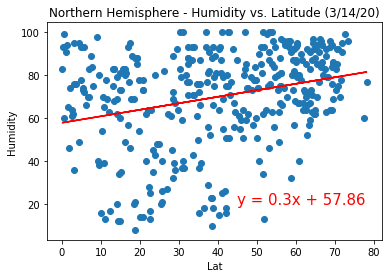

In [39]:
# Northern Hemisphere - Humidity vs. Lat
xlabel = "Lat"
ylabel = "Humidity"
labelpos = (45,20)
ifig="Northern Hemisphere - Humidity vs. Latitude (3/14/20)"
plot_regression(n_hem[xlabel], n_hem[ylabel], xlabel, ylabel, labelpos, ifig) 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.19696118835687165


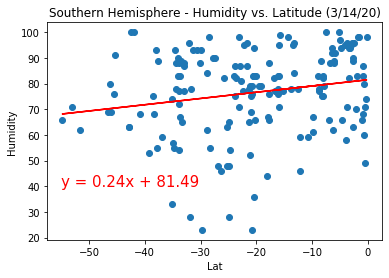

In [40]:
# Southern Hemisphere - Humidity vs. Lat
xlabel = "Lat"
ylabel = "Humidity"
labelpos = (-55,40)
ifig="Southern Hemisphere - Humidity vs. Latitude (3/14/20)"
plot_regression(s_hem[xlabel], s_hem[ylabel], xlabel, ylabel, labelpos, ifig) 

After running the linear regression for Humidity vs. Latitude for each hemisphere, the models and plots show that there does not appear to be a relationship between a city's latitude and its humidity percentage. Both models describe a correlation that is nonexistent or very weak.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.26184824109725785


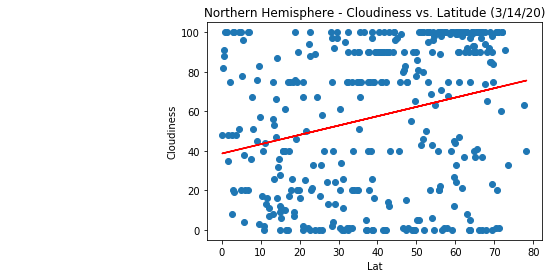

In [41]:
# Northern Hemisphere - Cloudiness vs. Lat
xlabel = "Lat"
ylabel = "Cloudiness"
labelpos = (-55,40)
ifig="Northern Hemisphere - Cloudiness vs. Latitude (3/14/20)"
plot_regression(n_hem[xlabel], n_hem[ylabel], xlabel, ylabel, labelpos, ifig) 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.22237564921916947


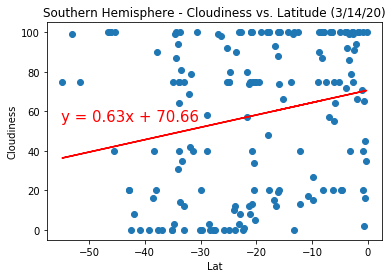

In [44]:
# Southern Hemisphere - Cloudiness vs. Lat
xlabel = "Lat"
ylabel = "Cloudiness"
labelpos = (-55,55)
ifig="Southern Hemisphere - Cloudiness vs. Latitude (3/14/20)"
plot_regression(s_hem[xlabel], s_hem[ylabel], xlabel, ylabel, labelpos, ifig) 

After running the linear regression for Cloudiness vs. Latitude for each hemisphere, the models and plots show that there does not appear to be a relationship between a city's latitude and its cloudiness percentage. Both models describe a correlation that is nonexistent or very weak.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.25991400475173804


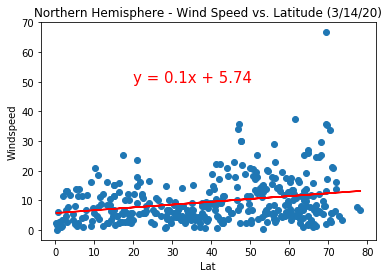

In [47]:
# Northern Hemisphere - Wind Speed vs. Lat
xlabel = "Lat"
ylabel = "Windspeed"
labelpos = (20,50)
ifig="Northern Hemisphere - Wind Speed vs. Latitude (3/14/20)"
plot_regression(n_hem[xlabel], n_hem[ylabel], xlabel, ylabel, labelpos, ifig) 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.23208048420701666


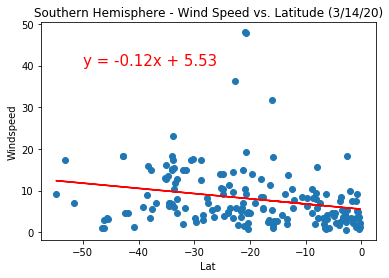

<Figure size 432x288 with 0 Axes>

In [60]:
# Southern Hemisphere - Wind Speed vs. Lat
xlabel = "Lat"
ylabel = "Windspeed"
labelpos = (-50,40)
ifig="Southern Hemisphere - Wind Speed vs. Latitude (3/14/20)"
plot_regression(s_hem[xlabel], s_hem[ylabel], xlabel, ylabel, labelpos, ifig) 

After running the linear regression for Wind Speed vs. Latitude for each hemisphere, the models and plots show that there does not appear to be a relationship between a city's latitude and its wind speed. Both models depict a correlation that is nonexistent or very weak.